Load Feature Engineered Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/total_features.csv")
df.head()

,date,arrivals,year,month,month_sin,month_cos,lag_1,lag_12,rolling_mean_3
0,2020-01-01,228422.0,2020,1,0.500000,8.660254e-01,71484.0,85874.0,120469.333333
1,2020-02-01,207501.0,2020,2,0.866025,5.000000e-01,228422.0,98573.0,169135.666667
2,2020-03-01,71367.0,2020,3,1.000000,6.123234e-17,207501.0,89548.0,169096.666667
3,2020-04-01,0.0,2020,4,0.866025,-5.000000e-01,71367.0,64667.0,92956.000000
4,2020-05-01,0.0,2020,5,0.500000,-8.660254e-01,0.0,10368.0,23789.000000


Define  Target

In [10]:
y = df["arrivals"]

In [15]:
print(df.head())
print(df.columns)

         date  arrivals  year  month  month_sin     month_cos     lag_1  \
0  2020-01-01  228422.0  2020      1   0.500000  8.660254e-01   71484.0   
1  2020-02-01  207501.0  2020      2   0.866025  5.000000e-01  228422.0   
2  2020-03-01   71367.0  2020      3   1.000000  6.123234e-17  207501.0   
3  2020-04-01       0.0  2020      4   0.866025 -5.000000e-01   71367.0   
4  2020-05-01       0.0  2020      5   0.500000 -8.660254e-01       0.0   

    lag_12  rolling_mean_3  
0  85874.0   120469.333333  
1  98573.0   169135.666667  
2  89548.0   169096.666667  
3  64667.0    92956.000000  
4  10368.0    23789.000000  
Index(['date', 'arrivals', 'year', 'month', 'month_sin', 'month_cos', 'lag_1',
       'lag_12', 'rolling_mean_3'],
      dtype='str')


Define Features 

In [16]:
y = df["arrivals"]

X = df[[
    "year",
    "month",
    "month_sin",
    "month_cos",
    "lag_1",
    "lag_12",
    "rolling_mean_3"
]]

Time-Aware Train/Test Split

In [17]:
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

Train Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Prediction created successfully")

Prediction created successfully


Evaluate

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE: 24655.148886992905
RMSE: 36856.06557499889
R2: 0.578109729345198


Train Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [21]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest Performance
MAE: 50741.55583333333
RMSE: 59168.768333162094
R2: -0.08734315345424748


Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

In [23]:
print("Gradient Boosting Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2:", r2_score(y_test, y_pred_gb))

Gradient Boosting Performance
MAE: 57312.70875549906
RMSE: 68041.48765581063
R2: -0.43790160034776204


XAI

In [24]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})

feature_importance = feature_importance.sort_values(
    by="Coefficient",
    key=abs,
    ascending=False
)

print(feature_importance)

          Feature   Coefficient
3       month_cos  18259.093485
2       month_sin -14526.477085
1           month  -2760.209595
0            year   2728.486667
6  rolling_mean_3      1.541854
4           lag_1     -0.551790
5          lag_12     -0.056837


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.3 MB 2.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.3 MB 2.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.3 MB 2.3 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.3 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.3 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.3 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.3 MB 2.1 MB/s eta 0:00:03
   ----------------- ---------------------- 3.7/8.3 MB 2.1 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.3 MB 2.1 MB/s eta 0:00:02
   ---------------------- ----------------- 4.7/8.3 MB 2.2 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.3 MB 2.1 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


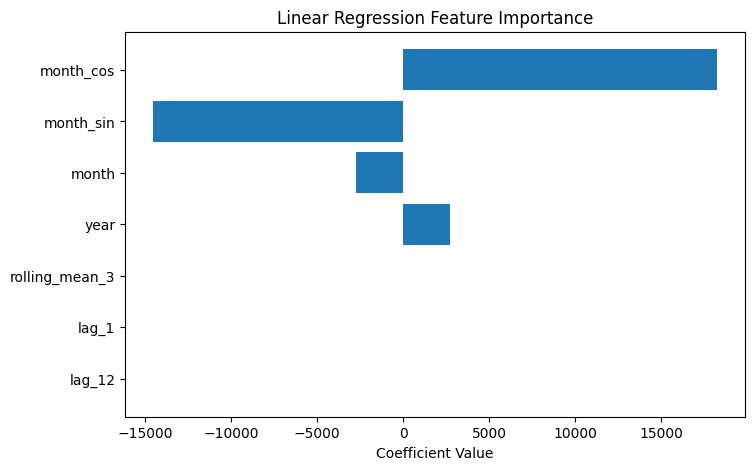

In [27]:
!pip install matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance["Feature"], feature_importance["Coefficient"])
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()